In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
dataset = pd.read_csv('../EDA/data.csv')
Y = pd.read_csv('../EDA/y.csv')

In [25]:
dataset.shape

(16747, 131)

In [11]:
def drop_non_year_column(titles):
    # Get Years in dataset
    drops = []
    for title in titles:
        # if not title.endswith("interPolation") and not column.endswith('Dummy') : drops.append(title)
        if not title.endswith("interPolation") : drops.append(title)
    return drops

In [23]:
dataset = dataset.set_index(["country","year"]).dropna(axis=0, how='all')

In [24]:
dataset

,,GDP-currentDollar-outdated,GDP-In2015Dollars,GDP-InCurrentDollars,GDP-In2017Dollars,GDP-PerCapita,GDP-perCapital2015Dollar,GDP-perCapital-current,GDP-perCapital2017Dollar,expenseOnEduOfGDP,UIS.ILLPOP.AG25T64,...,UIS.YADULT.PROFILITERACYinterPolation,UIS.YADULT.PROFILITERACY.GPIAinterPolation,childMortalityRatePer1000interPolation,taxRevenueOfGDPinterPolation,GDP-In2015DollarsinterPolationlog,GDP-In2017DollarsinterPolationlog,GDP-InCurrentDollarsinterPolationlog,GDP-PerCapitainterPolationlog,noGDPDummy,noTaxDummy
country,year,,,,,,,,,,,,,,,,,,,,,
ABW,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
AFE,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
AFG,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
AFW,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
AGO,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.885298,10.269082,10.321000,3.633698,True,True
YEM,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,45.7,NaN,10.279566,10.813705,10.865623,2.975160,True,True
ZAF,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.1,0.98632,25.8,24.218620,11.632975,11.846161,11.898079,3.804414,True,True


In [9]:
X_without = dataset.drop(columns=["year","country"], axis=0)

In [12]:
X_without = X_without.drop(columns=drop_non_year_column(X_without.columns), axis=0)

In [15]:
X_without = X_without.dropna(axis=0, how='all')

In [26]:
X_without.isna().sum().sort_values(ascending=False) /16747

UIS.PLILLITP.MinterPolation                   0.932227
UIS.PLILLITP.FinterPolation                   0.932227
UIS.PLILLITPinterPolation                     0.930137
UIS.YADULT.PROFILITERACY.GPIAinterPolation    0.916881
UIS.YADULT.PROFILITERACYinterPolation         0.910372
                                                ...   
grossDomesticSavingsinterPolation             0.288171
foreigDirectInvestmentOfGDPinterPolation      0.279632
childMortalityRatePer1000interPolation        0.196393
SP.POP.TOTLinterPolation                      0.189526
NY.GDP.MKTP.CD_yinterPolation                 0.144444
Length: 62, dtype: float64

In [8]:
largeNan = X_without.isna().sum()[X_without.isna().sum().values > 10000].keys()
X_without = X_without.drop(columns=largeNan, axis=0)

In [9]:
X_without = X_without.fillna(0)

In [10]:
for column in X_without.columns:
    if not column.endswith('Dummy') or not column.endswith('growth') or not column.endswith('PercentageGrowth'):
        X_without[column+'-growth'] = X_without[column].rolling(window=2).apply(lambda x: x.iloc[-1] - x.iloc[0])
        X_without[column+'-PercentageGrowth'] = X_without[column].rolling(window=2).apply(lambda x: ((x.iloc[-1] - x.iloc[0])/x.iloc[0]))

In [11]:
X_without = X_without.fillna(0)
X_without = X_without.replace(np.inf, 0)

In [12]:
bigNumbers = X_without.max()[X_without.max() > 10000000].keys()
for bigColumn in bigNumbers:
    X_without[bigColumn+"log"] = np.log10(X_without[bigColumn])

X_without = X_without.drop(columns=bigNumbers, axis=0)

c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
X_without = X_without.fillna(0)

In [14]:
X_without = X_without.replace(np.inf, 0)
X_without = X_without.replace(-np.inf, 0)

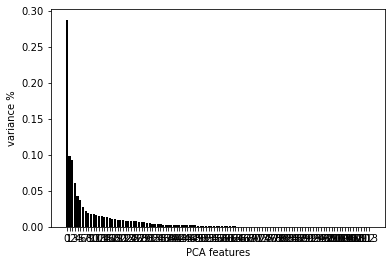

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(X_without)

pca = PCA()
principalComponents = pca.fit_transform(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [ ]:
np.sum(pca.explained_variance_ratio_[:11])

In [ ]:
# from sklearn.manifold import TSNE
# tSNE = TSNE(n_components=3)
# tSNE_COMPS = tSNE.fit_transform(PCA_components)

# tSNE_PCA_components = pd.DataFrame(tSNE_COMPS)

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.04)
plt.show()

In [ ]:
from sklearn import mixture
from mpl_toolkits.mplot3d import Axes3D

components = 8
features = 11

gmm = mixture.GaussianMixture(n_components=components, covariance_type='full')
labels = gmm.fit_predict(PCA_components.iloc[:,:features])

dataset["gmmLabels-"+str(components)+str(features)] = labels

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(PCA_components[2], PCA_components[6], PCA_components[5], c=labels, alpha=.5)
ax.view_init(elev=5., azim=200)

In [ ]:
# import numpy as np
# import itertools
# import matplotlib.pyplot as plt
# from sklearn import mixture

# for features in range(1,20):
#     lowest_bic = np.infty
#     bic = []
#     n_components_range = range(10, 20)
#     cv_types = ["spherical", "tied", "diag", "full"]
#     for cv_type in cv_types:
#         for n_components in n_components_range:
#             # Fit a Gaussian mixture with EM
#             gmm = mixture.GaussianMixture(
#                 n_components=n_components, covariance_type=cv_type
#             )
#             gmm.fit(PCA_components.iloc[:,:features])
#             bic.append(gmm.bic(PCA_components.iloc[:,:features]))
#             if bic[-1] < lowest_bic:
#                 lowest_bic = bic[-1]
#                 best_gmm = gmm

#     bic = np.array(bic)
#     color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
#     clf = best_gmm
#     bars = []

#     # Plot the BIC scores
#     plt.figure(figsize=(20, 4))
#     spl = plt.subplot(1, 1, 1)
#     for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
#         xpos = np.array(n_components_range) + 0.2 * (i - 2)
#         bars.append(
#             plt.bar(
#                 xpos,
#                 bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
#                 width=0.2,
#                 color=color,
#             )
#         )
#     plt.xticks(n_components_range)
#     plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
#     plt.title("BIC score per model " +str(features))
#     xpos = (
#         np.mod(bic.argmin(), len(n_components_range))
#         + 0.65
#         + 0.2 * np.floor(bic.argmin() / len(n_components_range))
#     )
#     plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
#     spl.set_xlabel("Number of components")
#     spl.legend([b[0] for b in bars], cv_types)
#     plt.show()

In [ ]:
dataset = dataset.merge(Y, how='inner', on=["year","country"])

In [ ]:
dataset

In [ ]:
checkingMatrix = dataset.iloc[:,-10:]

In [ ]:
dataset.to_csv("cluster.csv")

In [ ]:
setToCompare = "gmmLabels-1511"

clusters = len(checkingMatrix[setToCompare].unique())

bars = [np.mean(checkingMatrix[checkingMatrix[setToCompare]==i]["v2x_libdem"].dropna().values) for i in range(clusters)]
plt.bar(range(clusters),bars)
plt.xticks(range(clusters))
plt.show()

In [ ]:
import scipy.stats as scStat

setToCompare = "gmmLabels-1511"
clusters = len(checkingMatrix[setToCompare].unique())
democracyScore = "v2x_libdem"

for i in range(clusters):
    # print(len(checkingMatrix[checkingMatrix[setToCompare]==i]["v2x_partipdem"]))
    compareSet = checkingMatrix[checkingMatrix[setToCompare]==i][democracyScore].dropna().values
    if len(compareSet) > 8:
        normality_v2X_PartiDem = scStat.normaltest(compareSet)
        print(normality_v2X_PartiDem)
        for z in range(clusters):
            tTest = 0
            if i != z:
                compareSet2 = checkingMatrix[checkingMatrix[setToCompare]==z][democracyScore].dropna().values
                if len(compareSet2) > 8:
                    tTest = scStat.ttest_ind(compareSet,compareSet2)
                    print("Compare v2x_partipdem, of cluster", i, " against:", z, ":", tTest)
                    print("")
    print("")
